<a href="https://colab.research.google.com/github/Sela80/s/blob/main/la_taille_du_march%C3%A9_des_v%C3%A9hicules_%C3%A9lectriques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*L’analyse* de la taille du marché est un aspect crucial de l’étude de marché qui détermine le volume des ventes potentielles sur un marché donné. Il aide les entreprises à comprendre l'ampleur de la demande, à évaluer les niveaux de saturation du marché et à identifier les opportunités de croissance.

---



Analyse de la taille du marché des véhicules électriques



In [ ]:
#Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
# Chemin vers le fichier CSV
file_path = '/content/Electric_Vehicle_Population_Data.csv'
# Charger le fichier CSV dans un DataFrame


In [ ]:
#lire le Dataset
Data = pd.read_csv(file_path)

#Exploration de données :


In [ ]:
Data.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJYGDEE1L,King,Seattle,WA,98122,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,37.0,125701579,POINT (-122.30839 47.610365),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,7SAYGDEE9P,Snohomish,Bothell,WA,98021,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,1.0,244285107,POINT (-122.179458 47.802589),PUGET SOUND ENERGY INC,5.306105e+10
2,5YJSA1E4XK,King,Seattle,WA,98109,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,36.0,156773144,POINT (-122.34848 47.632405),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,5YJSA1E27G,King,Issaquah,WA,98027,2016,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,5.0,165103011,POINT (-122.03646 47.534065),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
4,5YJYGDEE5M,Kitsap,Suquamish,WA,98392,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,23.0,205138552,POINT (-122.55717 47.733415),PUGET SOUND ENERGY INC,5.303594e+10


In [ ]:

sns.boxenplot(y=Data['Model Year'])

In [ ]:
#informations sur le dataset
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173146 entries, 0 to 173145
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         173146 non-null  object 
 1   County                                             173141 non-null  object 
 2   City                                               173141 non-null  object 
 3   State                                              173146 non-null  object 
 4   Postal Code                                        173141 non-null  float64
 5   Model Year                                         173146 non-null  int64  
 6   Make                                               173146 non-null  object 
 7   Model                                              173146 non-null  object 
 8   Electric Vehicle Type                              173146 non-null  object

In [ ]:
#Verification statistiques sur le dataset
Data.describe()

,Postal Code,Model Year,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,2020 Census Tract
count,117339.000000,117339.000000,117339.000000,117339.000000,117272.000000,1.173390e+05,1.173380e+05
mean,98194.311295,2020.539318,59.314712,1081.865364,30.670782,2.202913e+08,5.301930e+10
std,1261.277453,2.966886,92.289061,8512.384817,14.656618,7.650392e+07,8.378627e+08
min,1905.000000,1998.000000,0.000000,0.000000,1.000000,4.777000e+03,1.001020e+09
25%,98042.000000,2019.000000,0.000000,0.000000,18.000000,1.815632e+08,5.303301e+10
50%,98115.000000,2022.000000,0.000000,0.000000,35.000000,2.282510e+08,5.303303e+10
75%,98292.000000,2023.000000,82.000000,0.000000,43.000000,2.547341e+08,5.303509e+10
max,99403.000000,2024.000000,337.000000,845000.000000,49.000000,4.789346e+08,5.307794e+10


In [ ]:
#vérifier le nombre de colonnes et de lignes
Data.shape

(173146, 17)

le Dataset compose 173146 lignes et 17 colonnes

In [ ]:
#imprimer les colonnes
Data.columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Postal Code', 'Model Year',
       'Make', 'Model', 'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Electric Range',
       'Base MSRP', 'Legislative District', 'DOL Vehicle ID',
       'Vehicle Location', 'Electric Utility', '2020 Census Tract'],
      dtype='object')

In [ ]:
Data['Electric Vehicle Type'].value_counts()

Electric Vehicle Type
Battery Electric Vehicle (BEV)            135538
Plug-in Hybrid Electric Vehicle (PHEV)     37608
Name: count, dtype: int64

In [ ]:
#verifier les valeurs manquantes
Data.isnull().sum()

VIN (1-10)                                             0
County                                                 5
City                                                   5
State                                                  0
Postal Code                                            5
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 371
DOL Vehicle ID                                         1
Vehicle Location                                      10
Electric Utility                                       6
2020 Census Tract                                      6
dtype: int64

In [ ]:
Data.select_dtypes(include='object').columns

Index(['VIN (1-10)', 'County', 'City', 'State', 'Make', 'Model',
       'Electric Vehicle Type',
       'Clean Alternative Fuel Vehicle (CAFV) Eligibility', 'Vehicle Location',
       'Electric Utility'],
      dtype='object')

In [ ]:
Data.select_dtypes(include="int").columns

Index(['Model Year', 'Electric Range', 'Base MSRP'], dtype='object')

In [ ]:
#vérifier les types de données
Data.dtypes

VIN (1-10)                                            object
County                                                object
City                                                  object
State                                                 object
Postal Code                                          float64
Model Year                                             int64
Make                                                  object
Model                                                 object
Electric Vehicle Type                                 object
Clean Alternative Fuel Vehicle (CAFV) Eligibility     object
Electric Range                                         int64
Base MSRP                                              int64
Legislative District                                 float64
DOL Vehicle ID                                         int64
Vehicle Location                                      object
Electric Utility                                      object
2020 Census Tract       

In [ ]:
#vérifier les valeurs doubles
Data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
173141    False
173142    False
173143    False
173144    False
173145    False
Length: 173146, dtype: bool

<ipython-input-20-8a8efa10f695>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=adoption_par_année.index, y=adoption_par_année.values, palette="viridis")


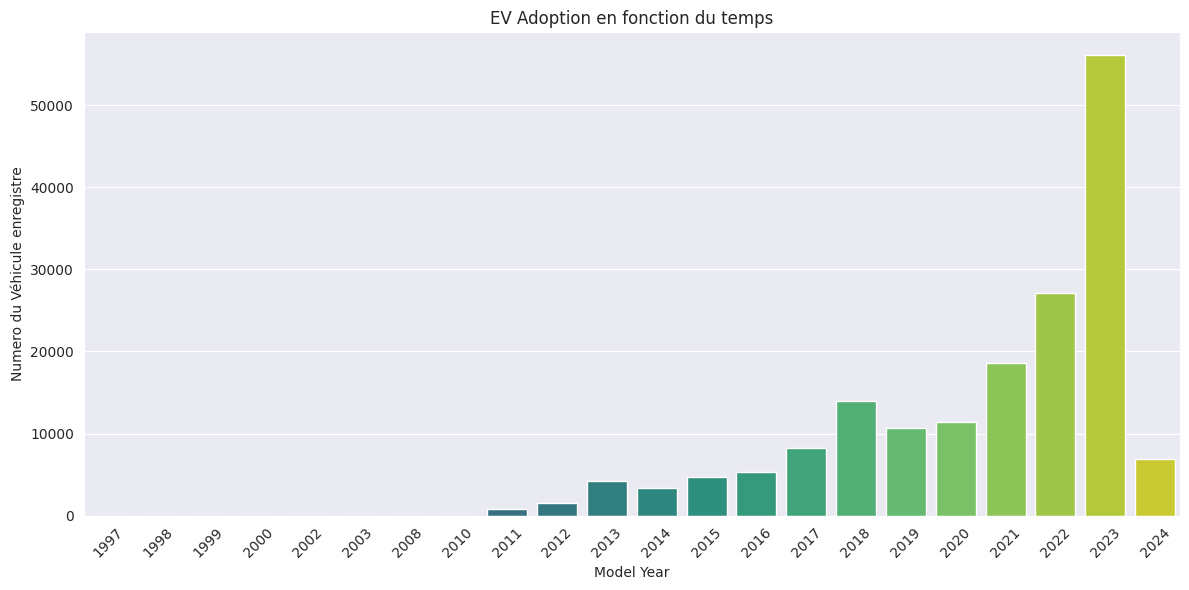

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# EV Adoption Over Time
plt.figure(figsize=(12, 6))
adoption_par_année = Data['Model Year'].value_counts().sort_index()
sns.barplot(x=adoption_par_année.index, y=adoption_par_année.values, palette="viridis")
plt.title('EV Adoption en fonction du temps')
plt.xlabel('Model Year')
plt.ylabel('Numero du Véhicule enregistre')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Le graphique à barres ci-dessus montre clairement que l'adoption des véhicules électriques a augmenté au fil du temps, en particulier en notant une tendance à la hausse significative à partir de 2016 environ. Le nombre de véhicules immatriculés augmente modestement jusqu'à ce point, puis commence à augmenter plus rapidement à partir de 2017. L’année 2023 montre une augmentation particulièrement forte du nombre de véhicules électriques immatriculés, la barre pour 2023 étant la plus haute du graphique, indiquant un pic d’adoption des véhicules électriques.

Commençons maintenant par sélectionner les 3 principaux comtés en fonction des immatriculations de véhicules électriques, puis analysons la répartition des véhicules électriques dans les villes de ces comtés :



Le graphique ci-dessus compare le nombre de véhicules électriques immatriculés dans diverses villes de trois comtés : King, Snohomish et Pierce. Les barres horizontales représentent les villes et leur longueur correspond au nombre de véhicules immatriculés, codés par couleur par comté. Voici les principales conclusions du graphique ci-dessus :

Seattle, qui se trouve dans le comté de King, compte de loin le plus grand nombre d'immatriculations de véhicules électriques, dépassant de loin les autres villes répertoriées.
Bellevue et Redmond, également dans le comté de King, suivent Seattle avec les inscriptions les plus élevées, bien que celles-ci soient considérablement inférieures à celles de Seattle.
Les villes du comté de Snohomish, comme Kirkland et Sammamish, affichent des immatriculations de véhicules électriques modérées.
Tacoma et Tukwila, représentant le comté de Pierce, ont le moins d'immatriculations de véhicules électriques parmi les villes répertoriées, Tacoma étant légèrement devant Tukwila.
La majorité des villes présentées proviennent du comté de King, qui semble dominer les immatriculations de véhicules électriques parmi les trois comtés.
Dans l’ensemble, le graphique indique que l’adoption des véhicules électriques n’est pas uniforme dans toutes les villes et qu’elle est plus concentrée dans certaines zones, en particulier dans le comté de King.



Explorons ensuite les types de véhicules électriques représentés dans cet ensemble de données. Comprendre la répartition entre les différents types de véhicules électriques, tels que les véhicules électriques à batterie (BEV) et les véhicules électriques hybrides rechargeables (PHEV), peut fournir un aperçu des préférences des consommateurs et des modèles d'adoption de solutions électriques purement électriques par rapport aux solutions électriques hybrides. Visualisons donc la répartition des types de véhicules électriques pour voir quelles catégories sont les plus populaires parmi les véhicules immatriculés :

<ipython-input-21-9f608551260c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_distribution.values, y=type_distribution.index, palette="rocket")


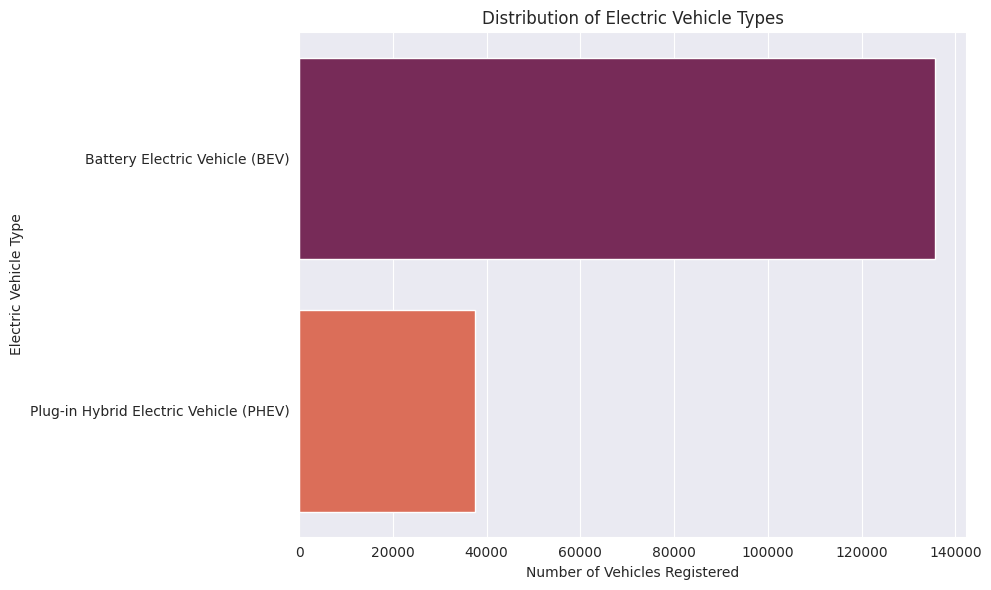

In [ ]:
# analyzing the distribution of electric vehicle Types
type_distribution = Data['Electric Vehicle Type'].value_counts()
plt.figure(figsize=(10, 6))
sns.barplot(x=type_distribution.values, y=type_distribution.index, palette="rocket")
plt.title('Distribution of Electric Vehicle Types')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Electric Vehicle Type')
plt.tight_layout()
plt.show()

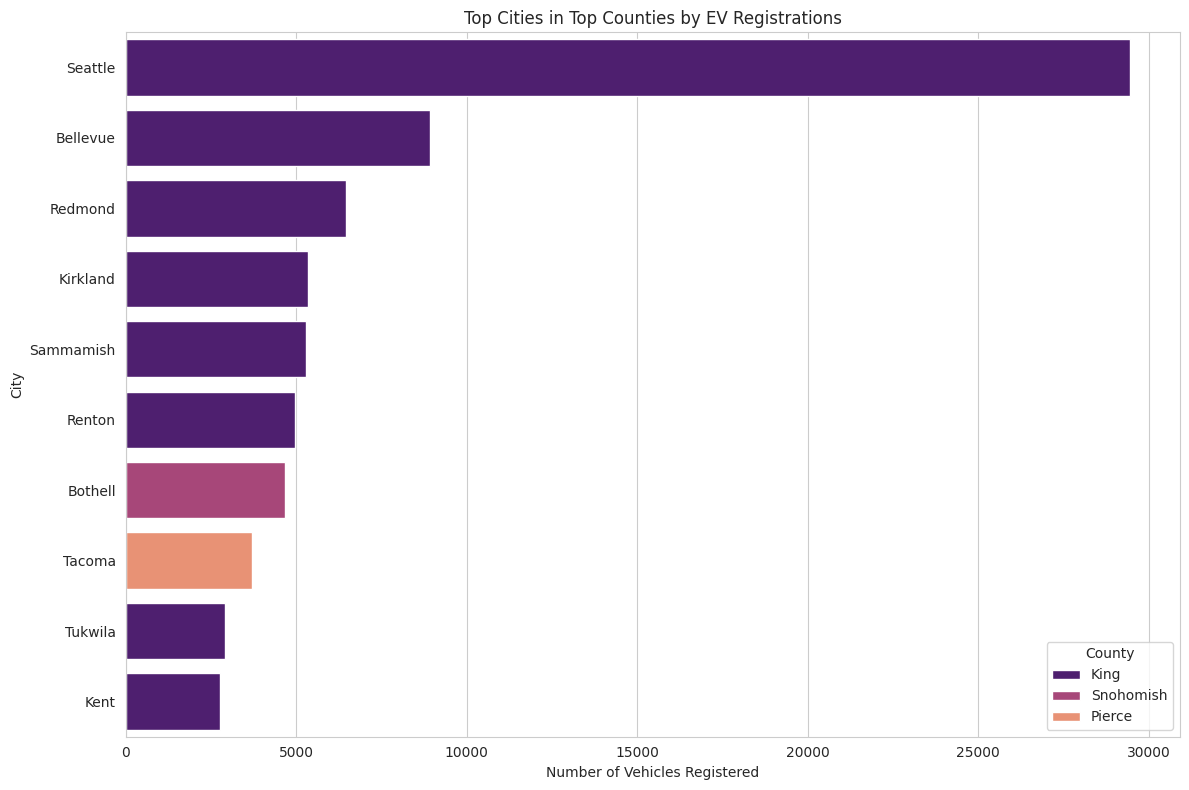

In [ ]:
# geographical distribution at county level
county_distribution = Data['County'].value_counts()
top_counties = county_distribution.head(3).index

# filtering the dataset for these top counties
top_counties_data = Data[Data['County'].isin(top_counties)]

# analyzing the distribution of EVs within the cities of these top counties
city_distribution_top_counties = top_counties_data.groupby(['County', 'City']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualize the top 10 cities across these counties
top_cities = city_distribution_top_counties.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='City', hue='County', data=top_cities, palette="magma")
plt.title('Top Cities in Top Counties by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('City')
plt.legend(title='County')
plt.tight_layout()
plt.show()

Le graphique ci-dessus montre que les BEV sont plus populaires ou préférés aux PHEV parmi les véhicules électriques
immatriculés aux États-Unis.

Intéressons-nous maintenant à la popularité des constructeurs et des modèles de véhicules électriques parmi les véhicules immatriculés. Cette analyse nous aidera à identifier quels fabricants et modèles spécifiques dominent le marché des véhicules électriques, indiquant potentiellement les préférences des consommateurs, la fidélité à la marque et le succès des stratégies de divers fabricants dans la promotion de la mobilité électrique.

Jetons donc un coup d'œil aux fabricants les plus populaires, puis examinons les modèles les plus populaires au sein de ces fabricants :

<ipython-input-22-2e861c5225ae>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=make_distribution.values, y=make_distribution.index, palette="cubehelix")


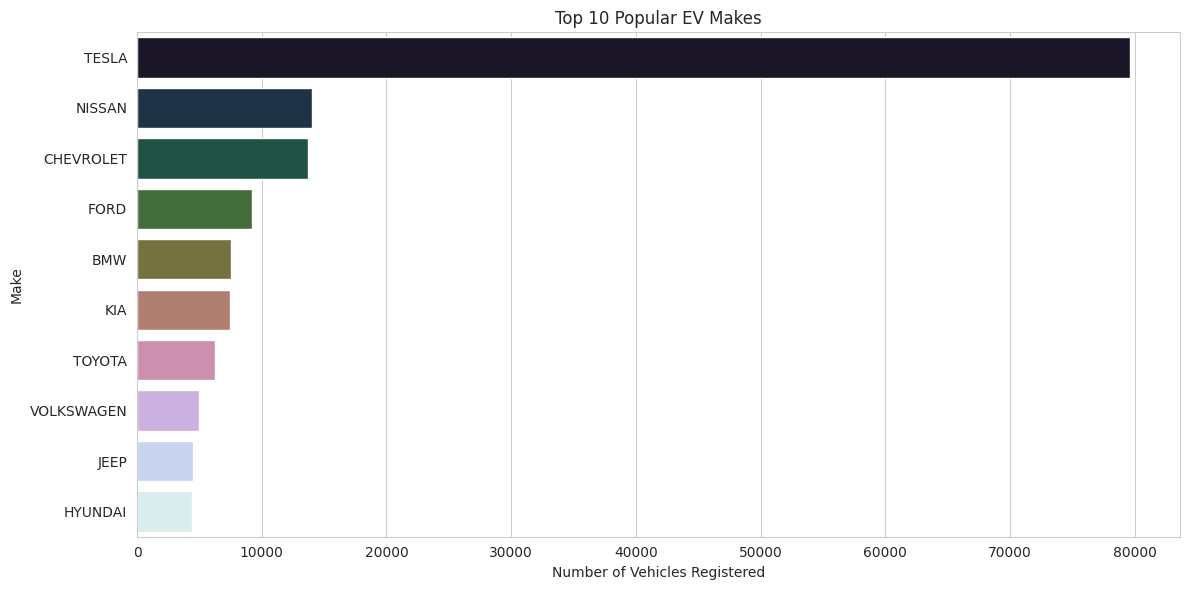

In [ ]:
# analyzing the popularity of EV manufacturers
make_distribution = Data['Make'].value_counts().head(10)
# Limiting to top 10 for clarity
plt.figure(figsize=(12, 6))
sns.barplot(x=make_distribution.values, y=make_distribution.index, palette="cubehelix")
plt.title('Top 10 Popular EV Makes')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Make')
plt.tight_layout()
plt.show()

Le graphique ci-dessus montre que :

TESLA est en tête avec une marge substantielle avec le plus grand nombre de véhicules immatriculés.
NISSAN est le deuxième constructeur le plus populaire, suivi de CHEVROLET, bien que les deux aient nettement moins d'immatriculations que TESLA.
FORD, BMW, KIA, TOYOTA, VOLKSWAGEN, JEEP et HYUNDAI suivent par ordre décroissant du nombre de véhicules immatriculés.
Examinons ensuite les modèles les plus populaires au sein de ces grands fabricants pour avoir une compréhension plus détaillée des préférences des consommateurs au niveau du modèle :

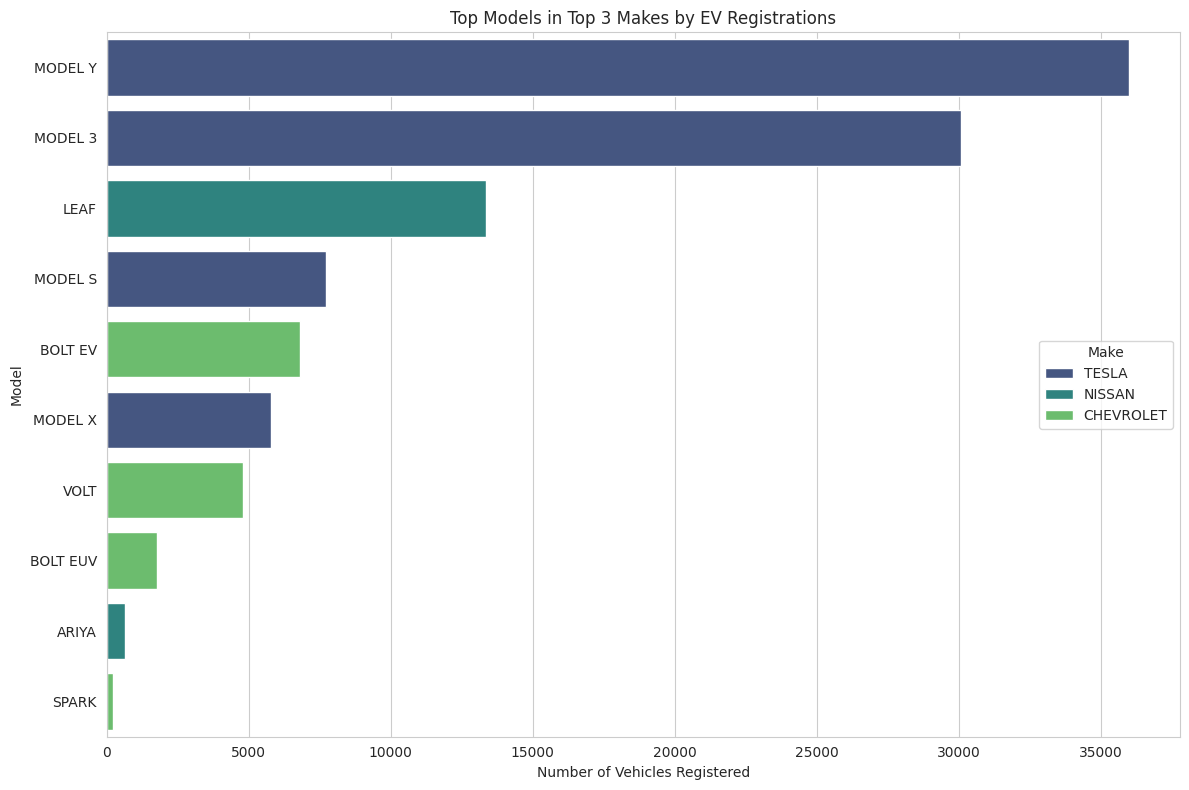

In [ ]:
# selecting the top 3 manufacturers based on the number of vehicles registered
top_3_makes = make_distribution.head(3).index

# filtering the dataset for these top manufacturers
top_makes_data = Data[Data['Make'].isin(top_3_makes)]

# analyzing the popularity of EV models within these top manufacturers
model_distribution_top_makes = top_makes_data.groupby(['Make', 'Model']).size().sort_values(ascending=False).reset_index(name='Number of Vehicles')

# visualizing the top 10 models across these manufacturers for clarity
top_models =model_distribution_top_makes.head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x='Number of Vehicles', y='Model', hue='Make', data=top_models, palette="viridis")
plt.title('Top Models in Top 3 Makes by EV Registrations')
plt.xlabel('Number of Vehicles Registered')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.tight_layout()
plt.show()

Le graphique ci-dessus montre la répartition des immatriculations de véhicules électriques entre les différents modèles des trois principaux constructeurs : TESLA, NISSAN et CHEVROLET. Voici les résultats :

Les MODEL Y et MODEL 3 de TESLA sont les véhicules les plus immatriculés, le MODEL Y ayant le plus grand nombre d'immatriculations.
La LEAF de NISSAN est le troisième modèle le plus enregistré et le véhicule non TESLA le plus enregistré.
Les MODEL S et MODEL X de TESLA comptent également un nombre important d'immatriculations.
Les BOLT EV et VOLT de CHEVROLET viennent ensuite au classement avec des immatriculations considérables, suivies par la BOLT EUV.
L'ARIYA de NISSAN et la SPARK de CHEVROLET ont le moins d'immatriculations parmi les modèles présentés.
Nous explorerons ensuite l’autonomie des véhicules électriques, qui constitue un facteur essentiel pour analyser la taille du marché des véhicules électriques. L’autonomie électrique indique la distance qu’un véhicule électrique peut parcourir avec une seule charge, et les progrès de la technologie des batteries n’ont cessé d’augmenter ces autonomies au fil des ans.

Examinons donc la répartition des autonomies électriques dans l'ensemble de données et identifions les tendances notables, telles que les améliorations au fil du temps ou les variations entre les différents types de véhicules ou fabricants :

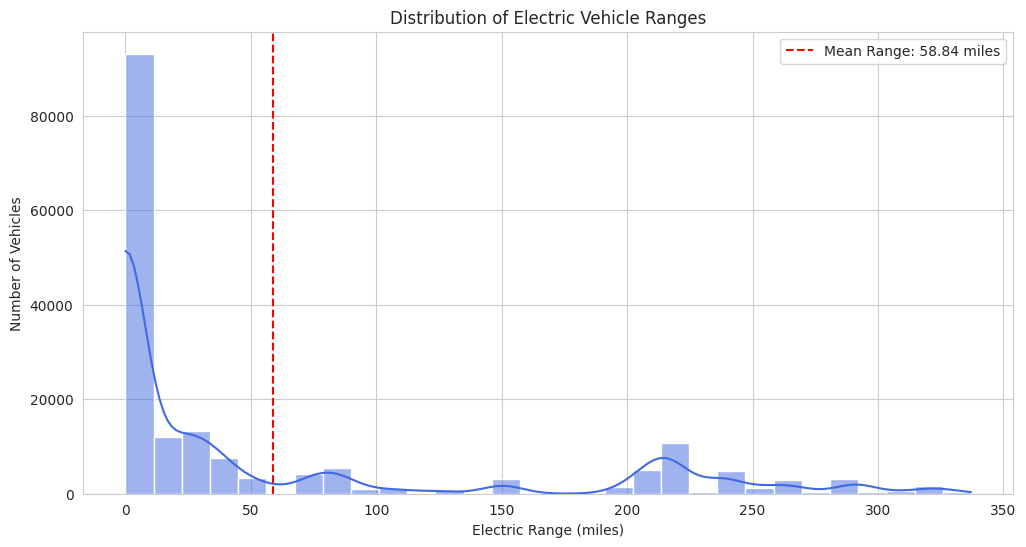

In [ ]:
# analyzing the distribution of electric range
plt.figure(figsize=(12, 6))
sns.histplot(Data['Electric Range'], bins=30, kde=True, color='royalblue')
plt.title('Distribution of Electric Vehicle Ranges')
plt.xlabel('Electric Range (miles)')
plt.ylabel('Number of Vehicles')
plt.axvline(Data['Electric Range'].mean(), color='red', linestyle='--', label=f'Mean Range: {Data["Electric Range"].mean():.2f} miles')
plt.legend()
plt.show()

Le graphique ci-dessus montre l’autonomie électrique moyenne. Les principales observations du graphique comprennent :

Il existe une fréquence élevée de véhicules avec une faible autonomie électrique, avec un pic important se produisant juste avant 80 kilomètres.
La répartition est asymétrique vers la droite, avec une longue queue s'étendant vers les gammes supérieures, bien que le nombre de véhicules dotés de gammes supérieures soit beaucoup moins fréquent.
L'autonomie électrique moyenne de cet ensemble de véhicules est d'environ 58,84 miles, ce qui est relativement faible par rapport aux autonomies les plus élevées indiquées dans le graphique.
Malgré la présence de véhicules électriques avec des autonomies allant jusqu'à environ 350 kilomètres, la majorité des véhicules ont une autonomie inférieure à la moyenne.
Cela suggère que même s’il existe des véhicules électriques dotés d’une autonomie électrique élevée, l’autonomie moyenne est inférieure en raison d’un nombre important de véhicules ayant une autonomie plus courte.


Examinons maintenant la tendance des autonomies électriques au fil des années modèles, ce qui peut donner un aperçu de la façon dont les progrès de la technologie des batteries et de la conception des véhicules ont influencé les capacités d'autonomie électrique des véhicules électriques au fil du temps. Une tendance positive dans cette analyse indiquerait des améliorations continues, offrant aux consommateurs des véhicules électriques avec une autonomie plus longue et répondant potentiellement à l’une des préoccupations majeures concernant le marché des véhicules électriques (l’anxiété liée à l’autonomie) :

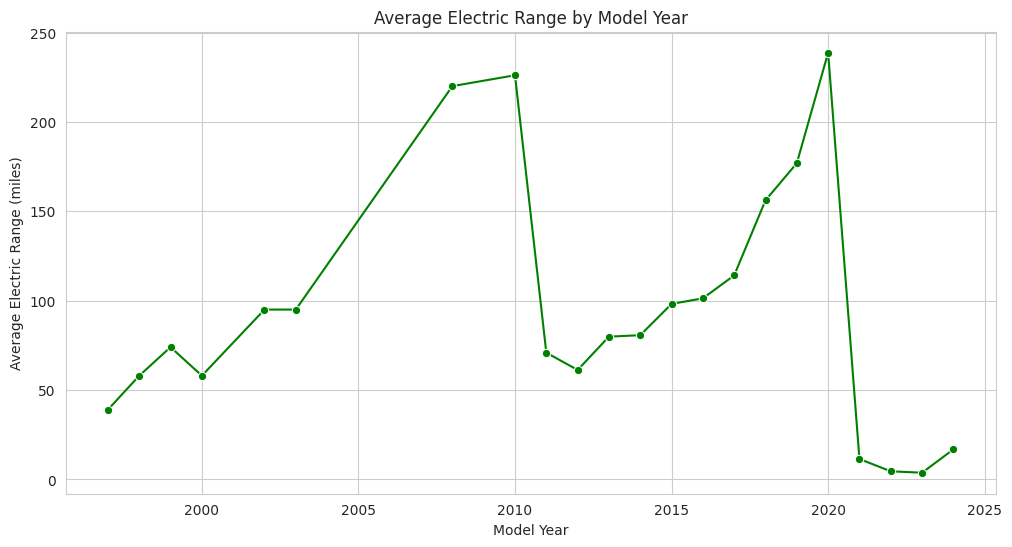

In [ ]:
# calculating the average electric range by model year
average_range_by_year = Data.groupby('Model Year')['Electric Range'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='Model Year', y='Electric Range', data=average_range_by_year, marker='o', color='green')
plt.title('Average Electric Range by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Average Electric Range (miles)')
plt.grid(True)
plt.show()

Le graphique ci-dessus montre la progression de l’autonomie électrique moyenne des véhicules entre 2000 et 2024 environ. Principales conclusions du graphique :

Il existe une tendance générale à la hausse de l’autonomie électrique moyenne des véhicules électriques au fil des ans, ce qui indique des améliorations en matière de technologie et d’efficacité des batteries.
Il y a un pic notable vers 2020, lorsque la fourchette moyenne atteint son point le plus élevé.
Après 2020, on observe une baisse significative de la fourchette moyenne, ce qui pourrait indiquer que les données des années suivantes pourraient être incomplètes ou refléter l'introduction de plusieurs modèles de fourchette inférieure.
Après la forte baisse, on observe une légère reprise dans la fourchette moyenne de l’année la plus récente indiquée sur le graphique.
Les données suggèrent que même s’il y a eu des fluctuations, la tendance générale au cours des deux dernières décennies a été vers l’augmentation de l’autonomie électrique des véhicules électriques.



Voyons ensuite comment les autonomies électriques varient selon les principaux fabricants et modèles. Cette analyse peut révéler comment différents fabricants abordent l'aspect crucial de l'autonomie électrique et mettre en évidence quels modèles se distinguent par leurs capacités d'autonomie supérieures :

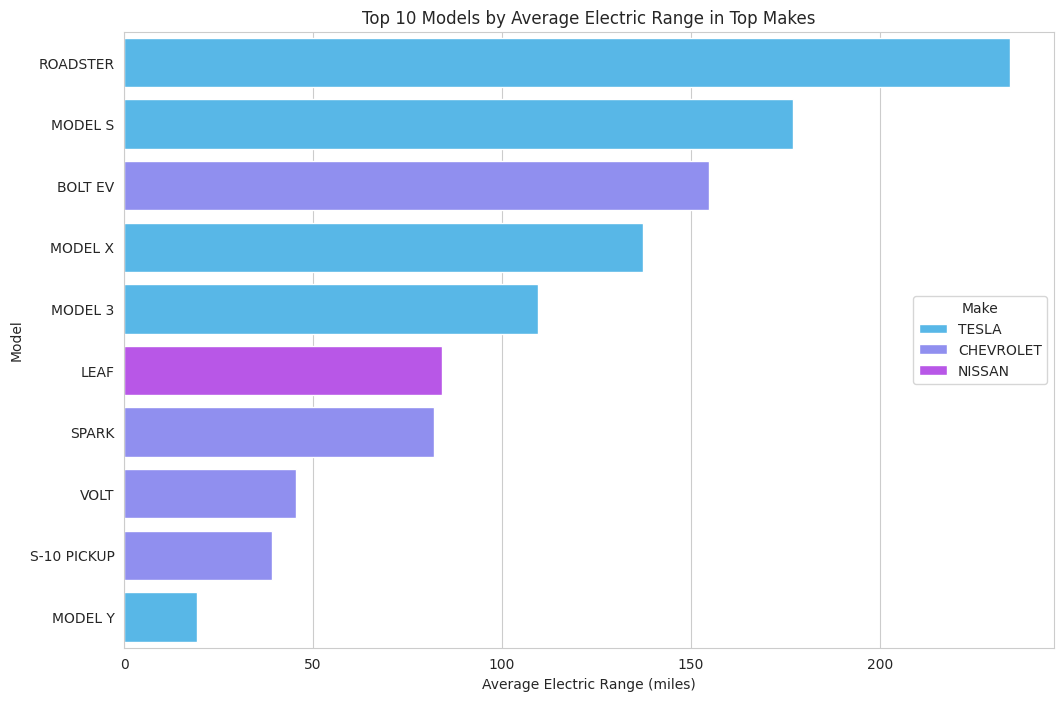

In [ ]:
average_range_by_model = top_makes_data.groupby(['Make', 'Model'])['Electric Range'].mean().sort_values(ascending=False).reset_index()

# the top 10 models with the highest average electric range
top_range_models = average_range_by_model.head(10)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='Electric Range', y='Model', hue='Make', data=top_range_models, palette="cool")
plt.title('Top 10 Models by Average Electric Range in Top Makes')
plt.xlabel('Average Electric Range (miles)')
plt.ylabel('Model')
plt.legend(title='Make', loc='center right')
plt.show()

La TESLA ROADSTER possède l’autonomie électrique moyenne la plus élevée parmi les modèles répertoriés. Les modèles TESLA (ROADSTER, MODEL S, MODEL X et MODEL 3) occupent la majorité des premières positions, ce qui indique qu'en moyenne, les véhicules TESLA ont une autonomie électrique plus élevée. Le CHEVROLET BOLT EV est une exception parmi les modèles CHEVROLET, ayant une autonomie nettement plus élevée que les VOLT et S-10 PICKUP du même fabricant. La LEAF de NISSAN et la SPARK de CHEVROLET se situent dans la moitié inférieure du graphique, suggérant des fourchettes moyennes plus modestes

# Analyse estimée de la taille du marché des véhicules électriques aux États-Unis

Passons maintenant à la recherche de la taille estimée du marché des véhicules électriques aux États-Unis. Je vais d'abord compter le nombre de véhicules électriques immatriculés chaque année :

In [ ]:
# calculate the number of EVs registered each year
ev_registration_counts = Data['Model Year'].value_counts().sort_index()
ev_registration_counts

Model Year
1997        1
1998        1
1999        5
2000        7
2002        2
2003        1
2008       20
2010       23
2011      775
2012     1618
2013     4409
2014     3509
2015     4844
2016     5483
2017     8562
2018    14323
2019    10940
2020    11768
2021    19132
2022    27776
2023    57587
2024     7080
Name: count, dtype: int64

L'ensemble de données fournit le nombre de véhicules électriques immatriculés chaque année de 1997 à 2024. Cependant, les données pour 2024 sont incomplètes car elles ne contiennent que les données jusqu'en mars. Voici un résumé des immatriculations de véhicules électriques des dernières années :

En 2021, 19 063 véhicules électriques ont été immatriculés.
En 2022, ce nombre est passé à 27 708 véhicules électriques.
En 2023, une hausse significative à 57 519 véhicules électriques a été observée.
Pour 2024, actuellement, 7 072 véhicules électriques sont immatriculés, ce qui suggère des données partielles.
Pour prévoir le nombre total de véhicules électriques qui devraient être immatriculés en 2024, nous pouvons utiliser une approche basée sur le taux de croissance des années complètes précédentes.

Nous calculerons le taux de croissance annuel composé (TCAC) entre une année récente avec des données complètes (2023) et une année antérieure pour projeter les chiffres de 2024. De plus, en utilisant ce taux de croissance, nous pouvons estimer la taille du marché pour les cinq prochaines années. Continuons avec ces calculs :

In [ ]:
from scipy.optimize import curve_fit
import numpy as np

# filter the dataset to include years with complete data, assuming 2023 is the last complete year
filtered_years = ev_registration_counts[ev_registration_counts.index <= 2023]

# define a function for exponential growth to fit the data
def exp_growth(x, a, b):
    return a * np.exp(b * x)

# prepare the data for curve fitting
x_data = filtered_years.index - filtered_years.index.min()
y_data = filtered_years.values

# fit the data to the exponential growth function
params, covariance = curve_fit(exp_growth, x_data, y_data)

# use the fitted function to forecast the number of EVs for 2024 and the next five years
forecast_years = np.arange(2024, 2024 + 6) - filtered_years.index.min()
forecasted_values = exp_growth(forecast_years, *params)

# create a dictionary to display the forecasted values for easier interpretation
forecasted_evs = dict(zip(forecast_years + filtered_years.index.min(), forecasted_values))

print(forecasted_evs)

{2024: 79092.26282188788, 2025: 119565.0067456937, 2026: 180748.28469999955, 2027: 273239.9998226801, 2028: 413061.1675071592, 2029: 624431.0064891725}


Maintenant, traçons les données estimées sur la taille du marché :

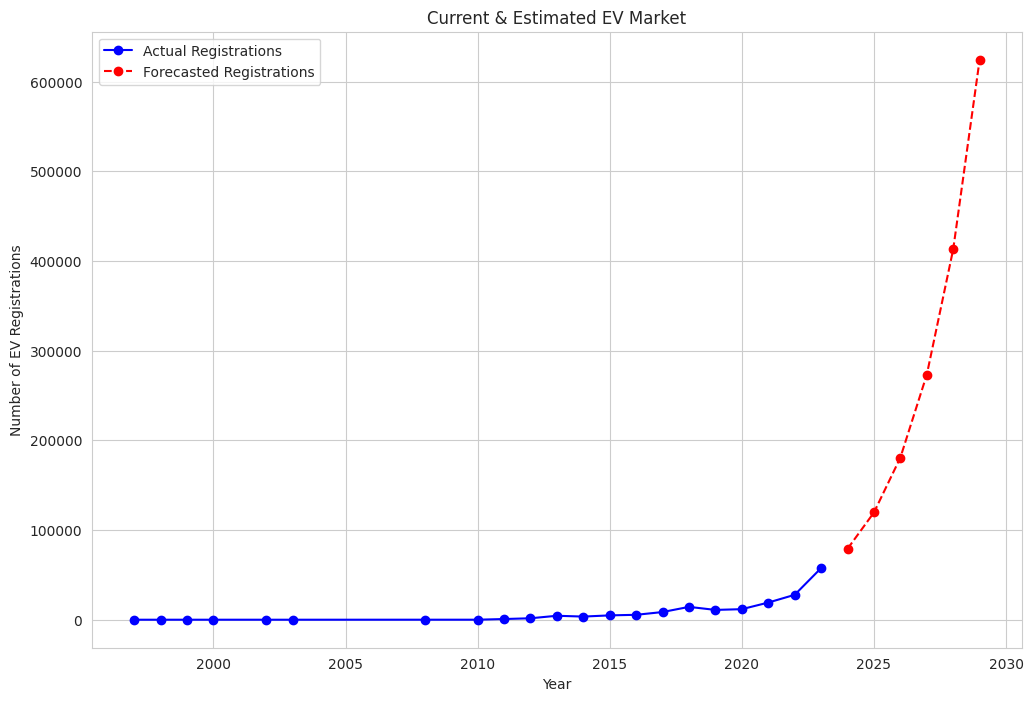

In [ ]:
# prepare data for plotting
years = np.arange(filtered_years.index.min(), 2029 + 1)
actual_years = filtered_years.index
forecast_years_full = np.arange(2024, 2029 + 1)

# actual and forecasted values
actual_values = filtered_years.values
forecasted_values_full = [forecasted_evs[year] for year in forecast_years_full]

plt.figure(figsize=(12, 8))
plt.plot(actual_years, actual_values, 'bo-', label='Actual Registrations')
plt.plot(forecast_years_full, forecasted_values_full, 'ro--', label='Forecasted Registrations')

plt.title('Current & Estimated EV Market')
plt.xlabel('Year')
plt.ylabel('Number of EV Registrations')
plt.legend()
plt.grid(True)

plt.show()

Du graphique ci-dessus, nous pouvons voir :

Le nombre d’immatriculations réelles de véhicules électriques est resté relativement faible et stable jusque vers 2010, après quoi une tendance à la hausse constante et abrupte a été observée, suggérant une augmentation significative de l’adoption des véhicules électriques.
Les immatriculations de véhicules électriques prévues prévoient une augmentation encore plus spectaculaire dans un avenir proche, le nombre d’immatriculations devant augmenter fortement dans les années à venir.
Compte tenu de la tendance croissante des immatriculations réelles de véhicules électriques et de l’accélération prévue selon les données prévisionnelles, nous pouvons conclure que la taille du marché des véhicules électriques devrait augmenter considérablement. La forte augmentation des immatriculations prévues suggère que l’adoption des véhicules électriques par les consommateurs est en hausse, et cette tendance est susceptible de se poursuivre. Dans l’ensemble, les données laissent présager un avenir prometteur pour l’industrie des véhicules électriques, indiquant un changement significatif dans les préférences des consommateurs et une augmentation potentielle des opportunités d’investissement et d’affaires associées.

Résumé
Ainsi, l’analyse de la taille du marché est un aspect crucial de l’étude de marché qui détermine le volume des ventes potentielles sur un marché donné. Il aide les entreprises à comprendre l'ampleur de la demande, à évaluer les niveaux de saturation du marché et à identifier les opportunités de croissance. À partir de notre analyse de la taille du marché des véhicules électriques, nous avons découvert un avenir prometteur pour l’industrie des véhicules électriques, indiquant un changement significatif dans les préférences des consommateurs et une augmentation potentielle des opportunités d’investissement et d’affaires associées.

J’espère que vous avez aimé cet article sur l’analyse de la taille du marché des véhicules électriques à l’aide de Python. N'hésitez pas à poser des questions précieuses dans la section commentaires ci-dessous. Vous pouvez me suivre sur Instagram pour de nombreuses autres ressources.

